In [1]:
# importing the necessary package
import pandas as pd
import numpy as np

In [2]:
# assigning the .csv file to a variable.
label=pd.read_csv("/Users/rohitbohra/Documents/aptos2019-blindness-detection/label.csv")

In [3]:
# first 5 rows in the dataframe.
label.head()

,Unnamed: 0,id_code,diagnosis
0,0,000c1434d8d7.png,2
1,1,00a8624548a9.png,2
2,2,00cb6555d108.png,1
3,3,0104b032c141.png,3
4,4,0124dffecf29.png,1


In [4]:
# column of the datasets
list(label.columns) 

['Unnamed: 0', 'id_code', 'diagnosis']

In [5]:
# dropping the unnecessary column from the dataframe
label=label.drop(['Unnamed: 0'], axis=1)
list(label.columns) 

['id_code', 'diagnosis']

In [6]:
# first 5 rows of data
label.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,00a8624548a9.png,2
2,00cb6555d108.png,1
3,0104b032c141.png,3
4,0124dffecf29.png,1


In [7]:
#importing the required packages
import cv2 
import os

path="/Users/rohitbohra/Documents/aptos2019-blindness-detection/train_images/"

#functiion for resizing the images
def get_image(path, id_code, size):
    img_path = os.path.join(path, id_code)
    image = cv2.imread(img_path)  
    image = cv2.resize(image, (size,size))
    image_arr = image.reshape( size,size, 3).astype('float32')/255
    #print(image_arr.shape)
    return image_arr

In [8]:
# reshaping the image shape
all_images = []
all_images.append(label['id_code'].apply(lambda code: get_image('/Users/rohitbohra/Documents/aptos2019-blindness-detection/train_images/',code, 96)))
x_train = np.array(all_images)

x_train = x_train.reshape(x_train.shape[1], 96,96, 3).astype('float32')


In [9]:
# labels of the dataset to be assigned to a variable
y_train = label['diagnosis']

In [10]:
# converting the label into categorical data
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

# number of classes
num_classes = y_train.shape[1]

/Users/rohitbohra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# splitting of dataset into train and test data with 80 - 20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [15]:
import pickle

pickle_on=open("X_train.pickle",'wb')
pickle.dump(X_train,pickle_on)
pickle_on.close()

pickle_on=open("y_train.pickle",'wb')
pickle.dump(y_train,pickle_on)
pickle_on.close()

pickle_on=open("X_test.pickle",'wb')
pickle.dump(X_test,pickle_on)
pickle_on.close()

pickle_on=open("y_test.pickle",'wb')
pickle.dump(y_test,pickle_on)
pickle_on.close()

In [16]:
pickle_off = open("X_train.pickle",'rb')
X_train=pickle.load(pickle_off)
print(X_train.shape)

pickle_off = open("y_train.pickle",'rb')
y_train=pickle.load(pickle_off)
print(y_train.shape)

pickle_off = open("X_test.pickle",'rb')
X_test=pickle.load(pickle_off)
print(X_test.shape)

pickle_off = open("y_test.pickle",'rb')
y_test=pickle.load(pickle_off)
print(y_test.shape)



(743, 96, 96, 3)
(743, 5)
(186, 96, 96, 3)
(186, 5)


In [21]:
# checking the shape of the train data and test data
print(X_train.shape)
print(X_test.shape)

(743, 96, 96, 3)
(186, 96, 96, 3)


In [22]:
# importing the packages for Neural Network uisng keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, GaussianNoise, GaussianDropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, SeparableConv2D

from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers

In [23]:
# building a function with the required layers and regularization layers added'


def build_model():
    # create model
    model = Sequential()
    model.add(Conv2D(15, (9, 9), input_shape=[96,96,3], activation='relu'))
    model.add(GaussianDropout(0.3))
    model.add(Conv2D(30, (7, 7), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (7, 7), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(50, (7, 7), activation='relu'))
    model.add(Conv2D(50, (5, 5), activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)
                   ,activity_regularizer=regularizers.l1(0.01)))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
model = build_model()

In [25]:
# using early stopping which will automatically stop the training of data when there is no improvement of the loss in test data

from keras.callbacks import EarlyStopping, ModelCheckpoint
es= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 10)
mc = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [26]:
# Fitting the model and checking how the model performs
model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=1000, batch_size=32, callbacks=[es,mc])

Train on 743 samples, validate on 186 samples
Epoch 1/1000
743/743 [==============================] - 62s 84ms/step - loss: 4.4149 - acc: 0.5047 - val_loss: 2.8607 - val_acc: 0.4785

Epoch 00001: val_loss improved from inf to 2.86069, saving model to model.h5
Epoch 2/1000
743/743 [==============================] - 62s 84ms/step - loss: 2.3953 - acc: 0.5087 - val_loss: 1.9695 - val_acc: 0.4785

Epoch 00002: val_loss improved from 2.86069 to 1.96951, saving model to model.h5
Epoch 3/1000
743/743 [==============================] - 60s 80ms/step - loss: 1.8223 - acc: 0.5087 - val_loss: 1.7015 - val_acc: 0.4785

Epoch 00003: val_loss improved from 1.96951 to 1.70146, saving model to model.h5
Epoch 4/1000
743/743 [==============================] - 59s 80ms/step - loss: 1.6478 - acc: 0.5087 - val_loss: 1.6103 - val_acc: 0.4785

Epoch 00004: val_loss improved from 1.70146 to 1.61034, saving model to model.h5
Epoch 5/1000
743/743 [==============================] - 61s 82ms/step - loss: 1.6065 -

In [28]:
history=model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=20, batch_size=32, callbacks=[es,mc])

Train on 743 samples, validate on 186 samples
Epoch 1/20
743/743 [==============================] - 60s 80ms/step - loss: 1.1116 - acc: 0.7254 - val_loss: 1.1779 - val_acc: 0.6828

Epoch 00001: val_loss did not improve from 1.17067
Epoch 2/20
743/743 [==============================] - 60s 80ms/step - loss: 1.1092 - acc: 0.7079 - val_loss: 1.1991 - val_acc: 0.7151

Epoch 00002: val_loss did not improve from 1.17067
Epoch 3/20
743/743 [==============================] - 59s 80ms/step - loss: 1.1018 - acc: 0.7201 - val_loss: 1.2092 - val_acc: 0.7204

Epoch 00003: val_loss did not improve from 1.17067
Epoch 4/20
743/743 [==============================] - 59s 80ms/step - loss: 1.0971 - acc: 0.7227 - val_loss: 1.2166 - val_acc: 0.7204

Epoch 00004: val_loss did not improve from 1.17067
Epoch 5/20
743/743 [==============================] - 59s 80ms/step - loss: 1.0815 - acc: 0.7322 - val_loss: 1.2140 - val_acc: 0.6882

Epoch 00005: val_loss did not improve from 1.17067
Epoch 6/20
743/743 [====

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic_val(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

Test Accuracy: 0.6881720423698425


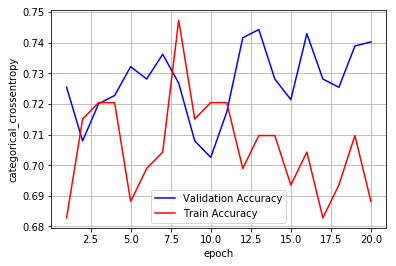

In [32]:
# Checking the accuracy of model on test data
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test Accuracy:', score[1]) 

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('categorical_crossentropy')

# list of epoch numbers
x = list(range(1,21))

vy = history.history['acc']
ty = history.history['val_acc']
plt_dynamic_val(x, vy, ty, ax)

In [46]:
def build_model1():
    # create model
    model = Sequential()
    model.add(Conv2D(250, (9, 9), input_shape=[96,96,3], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(230, (7, 7), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(150, (7, 7), activation='relu'))
    model.add(Conv2D(130, (5, 5), activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(526, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(254, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)
                   ,activity_regularizer=regularizers.l1(0.01)))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
model = build_model1()

In [48]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 10)
mc = ModelCheckpoint('model1.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [49]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=1000, batch_size=32, callbacks=[es,mc])

Train on 743 samples, validate on 186 samples
Epoch 1/1000
743/743 [==============================] - 2048s 3s/step - loss: 7.0873 - acc: 0.4320 - val_loss: 4.3630 - val_acc: 0.4785

Epoch 00001: val_loss improved from inf to 4.36305, saving model to model1.h5
Epoch 2/1000
743/743 [==============================] - 2033s 3s/step - loss: 3.4804 - acc: 0.4939 - val_loss: 2.5054 - val_acc: 0.5054

Epoch 00002: val_loss improved from 4.36305 to 2.50539, saving model to model1.h5
Epoch 3/1000
743/743 [==============================] - 2042s 3s/step - loss: 2.0686 - acc: 0.6083 - val_loss: 1.7245 - val_acc: 0.6935

Epoch 00003: val_loss improved from 2.50539 to 1.72454, saving model to model1.h5
Epoch 4/1000
743/743 [==============================] - 2035s 3s/step - loss: 1.6085 - acc: 0.6662 - val_loss: 1.5034 - val_acc: 0.6882

Epoch 00004: val_loss improved from 1.72454 to 1.50343, saving model to model1.h5
Epoch 5/1000
743/743 [==============================] - 2031s 3s/step - loss: 1.42

In [57]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test Accuracy:', score[1]) 

Test Accuracy: 0.47849462525818937


In [58]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["No. of layers", "Train Accuracy","Train loss","Test accuracy",'Test loss']
x.add_row([14,74.02,1.0509,68.82,1.2059])
x.add_row([14,71.87,1.1255,70.97,1.1993])


print('\t\t\t\tPerformance Table')
print(x)

				Performance Table
+---------------+----------------+------------+---------------+-----------+
| No. of layers | Train Accuracy | Train loss | Test accuracy | Test loss |
+---------------+----------------+------------+---------------+-----------+
|       14      |     74.02      |   1.0509   |     68.82     |   1.2059  |
|       14      |     71.87      |   1.1255   |     70.97     |   1.1993  |
+---------------+----------------+------------+---------------+-----------+


# Conclusion 

1) The data is imbalance, the count of each class is highly imbalance.

2) The image size is reshaped.

3) We build a neural network model with a total of 14 layers and use regularization to avoid overfitting.

4) We use EarlyStopping to automatically stop the training of the model when the model is not imporving.

5) The first model's train loss = 1.0509 and train accuracy = 74.02, and test loss = 1.2059 and test accuracy = 68.82

6) The model is slightly overfit as the model performs well for training dataset and not for testing dstaset. 

7) The second model's train loss = 1.1255 and train accuracy = 71.87, and test loss = 1.1993 and test accuracy = 70.97

8) The model is a good fit for both training dataset and testing dataset.

# Future Enhancement

1) For model to perform better, we can use other modeling techniques like transform learning.

2) As the dataset is very less to build a strong model, we can use data generator to generate new data from existing dataset.